In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder

plt.style.use('default')
pd.set_option('display.max_colwidth',None)

In [27]:
df=pd.read_csv('/content/PowerGeneration - PowerGeneration (1).csv')
df.sample(10)

,Dates,Power Station,Monitored Cap.(MW),Total Cap. Under Maintenace (MW),Planned Maintanence (MW),Forced Maintanence(MW),Other Reasons (MW),Programme or Expected(MU),Actual(MU),Excess(+) / Shortfall (-),Deviation
203975,2020-11-16,PPNPGCL,330.50,330.50,0.0,0.00,0,0,0,0.00,0.0
309283,2022-10-05,NPL,1400.00,0.00,0.0,0.00,0,0,33,5.45,0.0
269943,2021-11-16,Gujarat,9577.82,3102.72,210.0,1905.62,0,86,76,-10.19,0.0
203035,2020-11-10,TATA MAH.,447.00,24.00,0.0,24.00,0,3,3,-0.49,0.0
100238,2019-04-08,SEPL,97.00,48.50,0.0,0.00,0,0,0,0.15,0.0
88452,2019-01-28,NDPL,108.00,108.00,0.0,0.00,0,0,0,0.00,0.0
61088,2018-08-17,ABAN POWR,119.80,0.00,0.0,0.00,0,1,2,0.67,0.0
321201,2022-07-21,KONA,445.00,445.00,0.0,0.00,445,0,0,0.00,0.0
21034,2017-12-21,NHDC,1520.00,0.00,0.0,0.00,0,10,0,-9.90,0.0
301472,2022-11-01,ACB,325.00,160.00,0.0,135.00,25,0,3,-2.34,0.0


## **Problem 1 to 2:**

**Dataset link:** https://rb.gy/gsmddu

**Add a label to every axis and add a proper title for the charts (For every subplot, it is applicable). Also add proper labels if there are multiple representations.** Then, you can customize it as your wish.

### **Problem-1:** Make a subplots which have 2 plots.

- For the first chart, draw a scatter plot "*Monitored Cap.(MW)*" vs "*Total Cap. Under Maintenance (MW)*" of top 5 most frequent power stations. Then draw the lines which indicate the average values of these two columns. Change the colors according to the names of the Power Stations.
- For the second chart, draw a scatter plot "*Monitored Cap. (MW)*" vs "*Actual(MU)*" of the top 5 most frequent power stations. Also draw the lines which indicates the average values of these two columns. Change the colors according to the names of the Power Stations.


In [28]:
df['Power Station'].value_counts().head(5)

Power Station
NTPC Ltd.    9570
NHPC         5742
NPCIL        5742
GMR ENERG    5742
JSWEL        3828
Name: count, dtype: int64

In [29]:
x=df['Power Station'].value_counts().head(5).index

In [30]:
df1=df[df['Power Station'].isin(x)]
df1.head(1)

,Dates,Power Station,Monitored Cap.(MW),Total Cap. Under Maintenace (MW),Planned Maintanence (MW),Forced Maintanence(MW),Other Reasons (MW),Programme or Expected(MU),Actual(MU),Excess(+) / Shortfall (-),Deviation
28,2017-09-01,NHPC,4154.2,217.0,0.0,206.0,0,69,75,6.01,0.0


In [32]:
column_to_encode = 'Power Station'
label_encode=LabelEncoder()
df1[column_to_encode]=label_encode.fit_transform(df1[column_to_encode])

<ipython-input-32-b453a023a5b8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[column_to_encode]=label_encode.fit_transform(df1[column_to_encode])


In [34]:
df1.head()

,Dates,Power Station,Monitored Cap.(MW),Total Cap. Under Maintenace (MW),Planned Maintanence (MW),Forced Maintanence(MW),Other Reasons (MW),Programme or Expected(MU),Actual(MU),Excess(+) / Shortfall (-),Deviation
28,2017-09-01,2,4154.20,217.00,0.0,206.0,0,69,75,6.01,0.0
30,2017-09-01,3,1520.00,0.00,0.0,0.0,0,30,35,5.21,0.0
32,2017-09-01,4,12659.06,3364.66,710.0,995.0,0,182,162,-19.98,0.0
61,2017-09-01,0,600.00,300.00,0.0,300.0,0,9,6,-3.03,0.0
66,2017-09-01,1,1200.00,300.00,0.0,300.0,0,20,15,-4.35,0.0


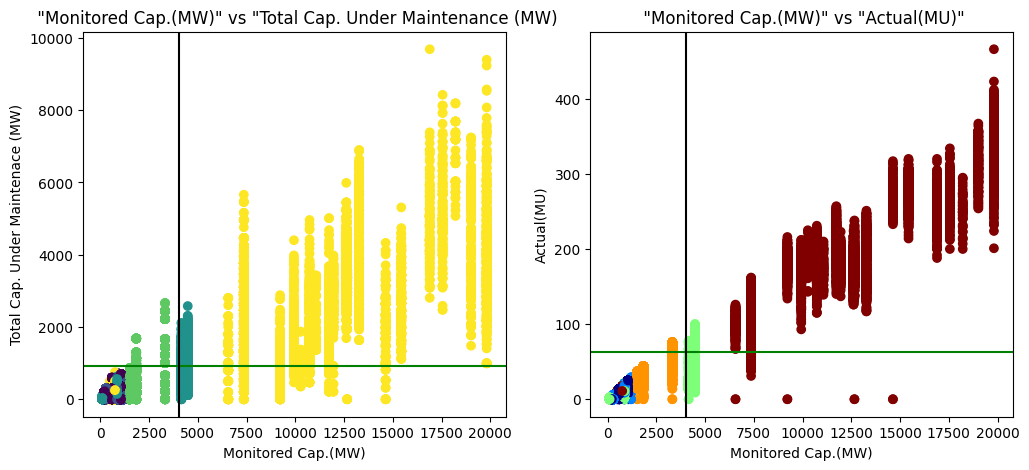

In [40]:
# code here
fig,ax=plt.subplots(1,2,figsize=(12,5))
ax[0].scatter(df1['Monitored Cap.(MW)'],df1['Total Cap. Under Maintenace (MW)'],c=df1['Power Station'],cmap='viridis')
ax[0].set_title(''' "Monitored Cap.(MW)" vs "Total Cap. Under Maintenance (MW)''')
ax[0].set_xlabel('Monitored Cap.(MW)')
ax[0].set_ylabel('Total Cap. Under Maintenace (MW)')
ax[0].axhline(df1['Total Cap. Under Maintenace (MW)'].mean(),color='green')
ax[0].axvline(df1['Monitored Cap.(MW)'].mean(),color='black')

ax[1].scatter(df1['Monitored Cap.(MW)'],df1['Actual(MU)'],c=df1['Power Station'],cmap='jet')
ax[1].set_title(''' "Monitored Cap.(MW)" vs "Actual(MU)"''')
ax[1].set_xlabel('Monitored Cap.(MW)')
ax[1].set_ylabel('Actual(MU)')
ax[1].axhline(df1['Actual(MU)'].mean(),color='green')
ax[1].axvline(df1['Monitored Cap.(MW)'].mean(),color='black')

### **Problem-2:** Draw a 3D Scatter plot between "*Monitored Cap.(MW)*", "*Total Cap. Under Maintenace (MW)*" and "*Forced Maintanence(MW)*"

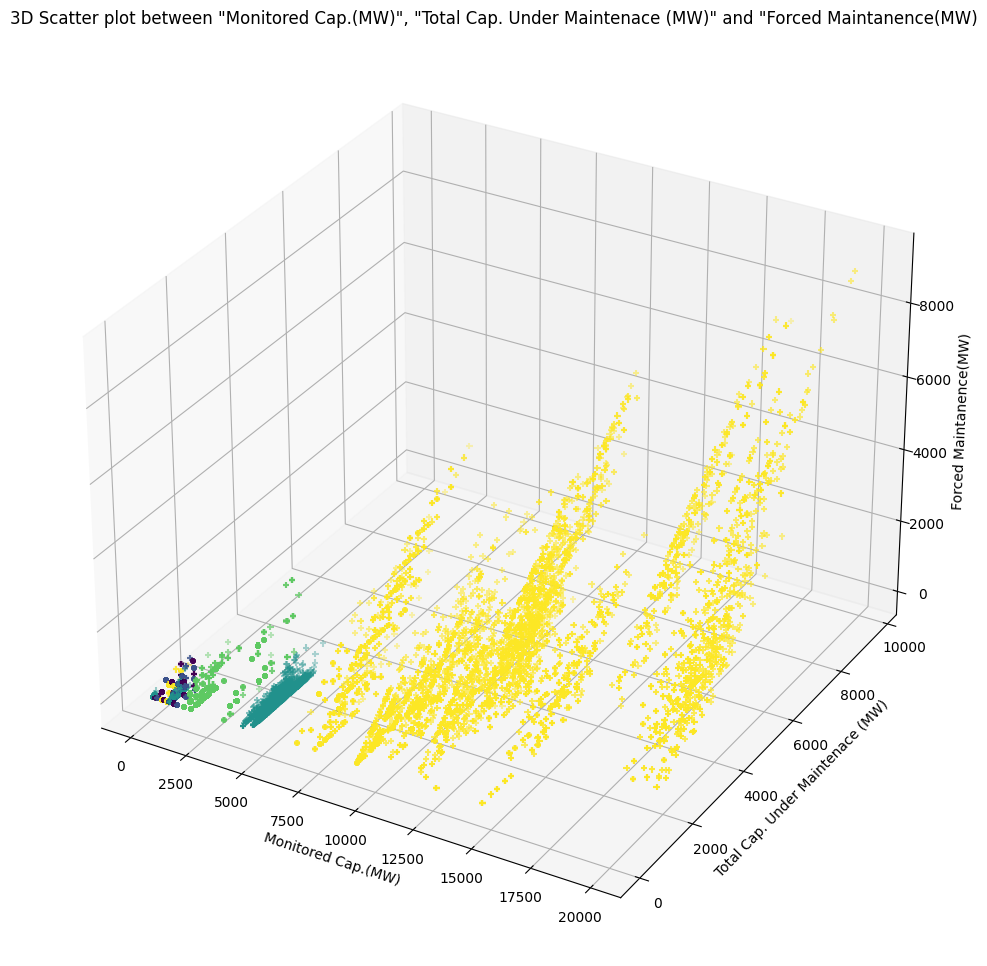

In [49]:
# code here
fig=plt.figure(figsize=(12,12))
ax=plt.subplot(projection='3d')
ax.scatter3D(df1['Monitored Cap.(MW)'],df1['Total Cap. Under Maintenace (MW)'],df1['Forced Maintanence(MW)'],marker='+',c=df1['Power Station'])
ax.set_title('''3D Scatter plot between "Monitored Cap.(MW)", "Total Cap. Under Maintenace (MW)" and "Forced Maintanence(MW)''')
ax.set_xlabel('Monitored Cap.(MW)')
ax.set_ylabel('Total Cap. Under Maintenace (MW)')
ax.set_zlabel('Forced Maintanence(MW)')
plt.show()

### **Problem-3:** Make a 3D *Surface* plot of this below mathematical equation.

$$z = |x| - |y|$$

In [52]:
# code here
x=np.linspace(-10,10,100)
y=np.linspace(-10,10,100)

In [57]:
xx,yy=np.meshgrid(x,y)

In [59]:
z=np.abs(xx)-np.abs(yy)
z.shape

(100, 100)

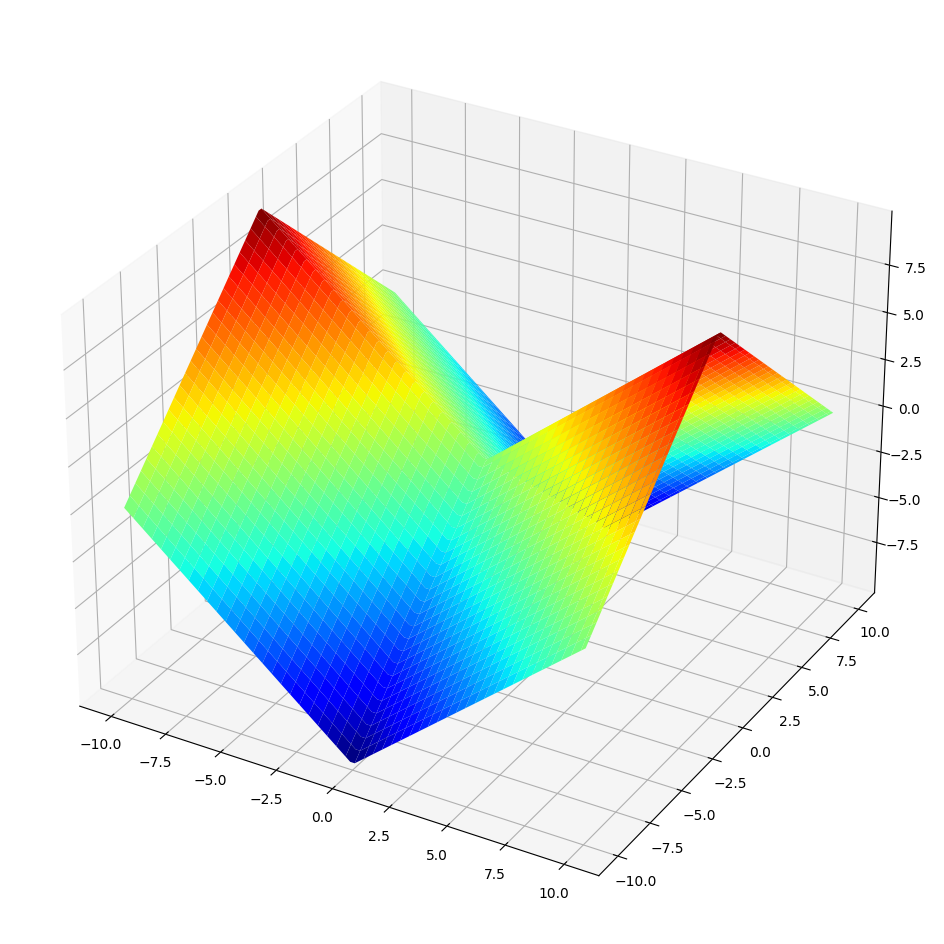

In [61]:
fig=plt.figure(figsize=(12,12))
ax=plt.subplot(projection='3d')
ax.plot_surface(xx,yy,z,cmap='jet')

### **Problem-4:** Draw the 3D *Contour plot* of this below equation:

$$z = |x| - |y|$$

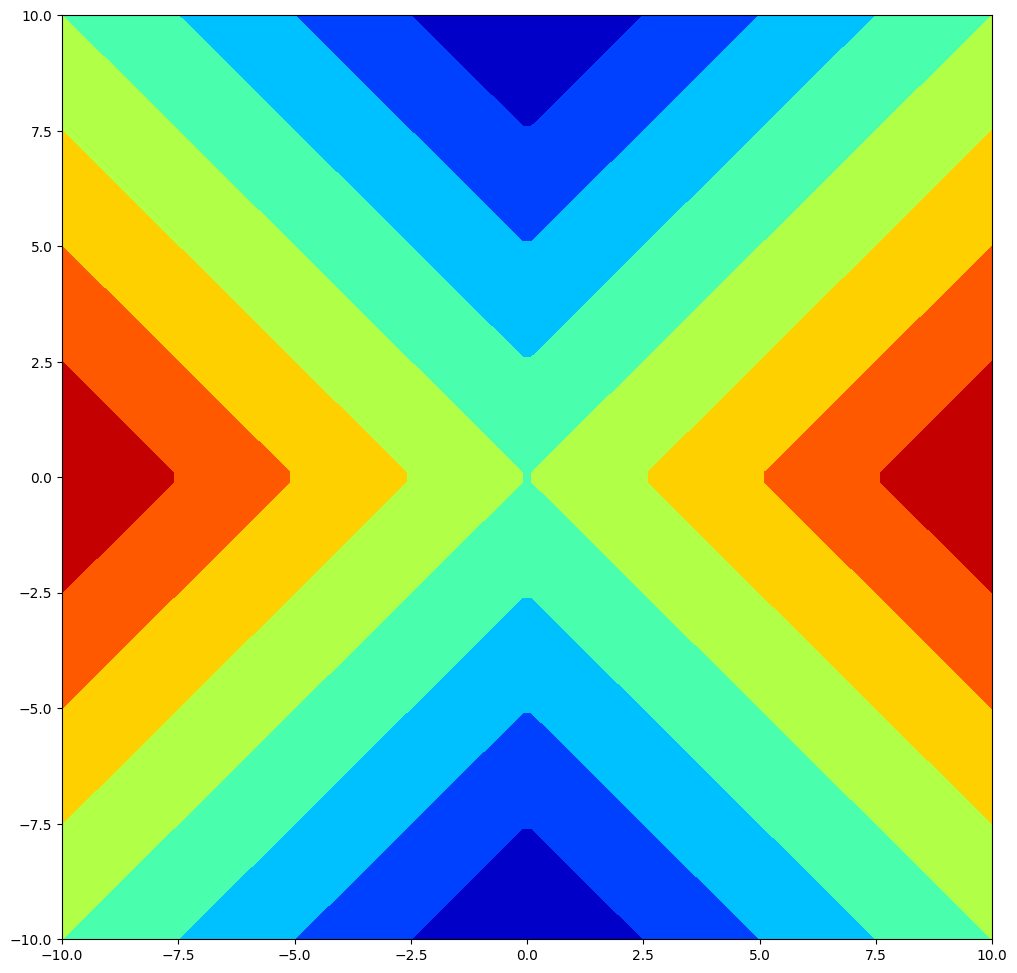

In [64]:
# code here
fig=plt.figure(figsize=(12,12))
ax=plt.subplot()
ax.contourf(xx,yy,z,cmap='jet')

### **Problem-5:** Draw a second type of Countour plot of the below equation:

$$z = |x| - |y|$$

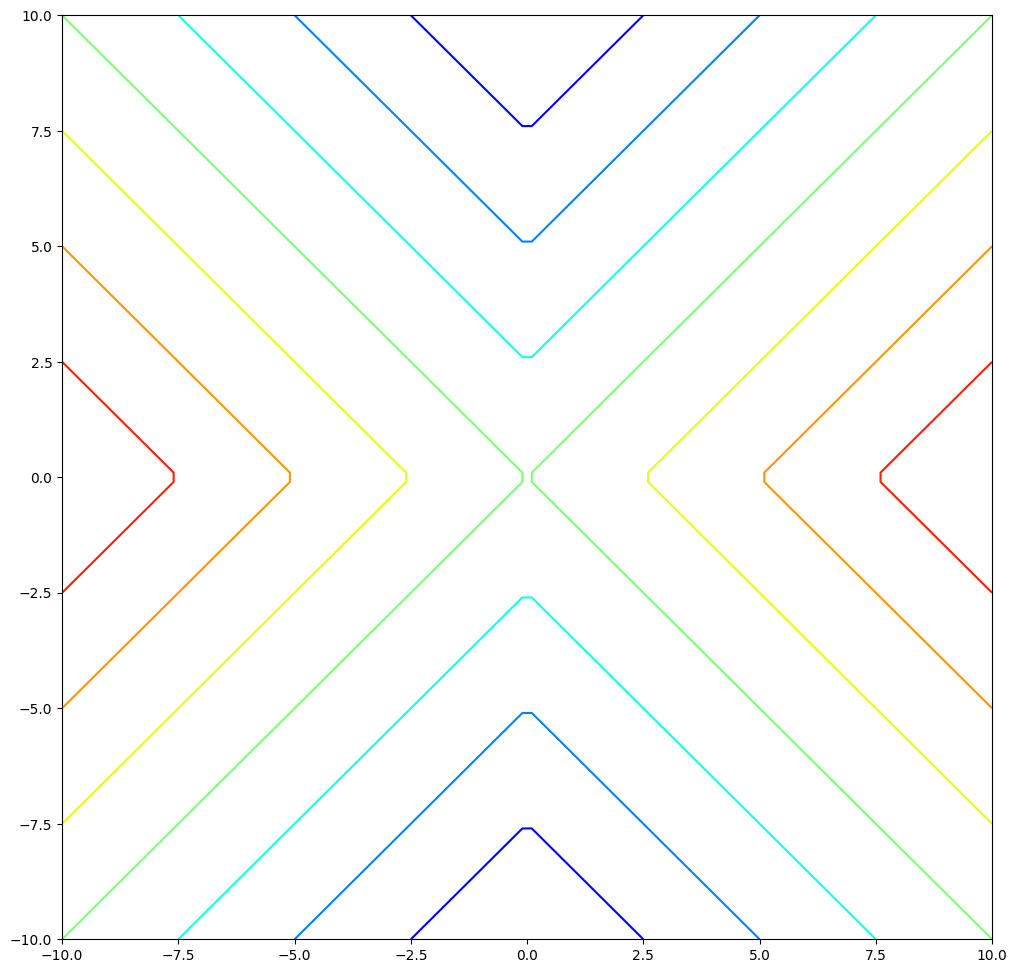

In [65]:
# code here
# code here
fig=plt.figure(figsize=(12,12))
ax=plt.subplot()
ax.contour(xx,yy,z,cmap='jet')

## `Problem 6-7`

Data Set Link - https://docs.google.com/spreadsheets/d/17tUL2yC7MGvo7txuuhLtAI-b6_C4jc0t7FLFxqRm-uI/edit?usp=share_link


**Description of Dataset:**

* Date: It gives the date of which stocks details are given.
* Symbol: Name of stock
* Open: It gives the opening price of stock on that date.
* High: It gives the highest price to which the stock ascened on that day.
* Low: It gives the highest price to which the stock plummeted on that day.
* Close: It gives the closing price of stock on that date.
* Volume: It gives the amount of stock traded on that date.
* VWAP: The volume-weighted average price (VWAP) is a statistic used by traders to determine what the average price is based on both price and volume.
* Turnover:

### `Problem-6` Use Pandas plot functions

* Line plot of closing value of top 5 Stocks in Year 2020.
* Take top 5 stocks based on total turnover in Year 2020

In [132]:
# code here
df2=pd.read_csv('/content/nifty-50 - nifty-50.csv.crdownload')
df2.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades
0,2000-01-03,HDFCBANK,EQ,157.40,166.00,170.00,166.00,170.00,170.00,169.52,33259.0,5.638122e+11,NaN
1,2000-01-04,HDFCBANK,EQ,170.00,182.00,183.45,171.00,174.00,173.80,174.99,168710.0,2.952261e+12,NaN
2,2000-01-05,HDFCBANK,EQ,173.80,170.00,173.90,165.00,168.00,166.95,169.20,159820.0,2.704094e+12,NaN
3,2000-01-06,HDFCBANK,EQ,166.95,168.00,170.00,165.30,168.95,168.30,168.44,85026.0,1.432166e+12,NaN
4,2000-01-07,HDFCBANK,EQ,168.30,162.15,171.00,162.15,170.75,168.35,166.79,85144.0,1.420158e+12,NaN


In [133]:
df2.set_index('Date',inplace=True)

In [134]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 363514 entries, 2000-01-03 to 2010-05-26
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Symbol      363514 non-null  object 
 1   Series      363514 non-null  object 
 2   Prev Close  363514 non-null  float64
 3   Open        363514 non-null  float64
 4   High        363514 non-null  float64
 5   Low         363514 non-null  float64
 6   Last        363514 non-null  float64
 7   Close       363514 non-null  float64
 8   VWAP        363513 non-null  float64
 9   Volume      363513 non-null  float64
 10  Turnover    363513 non-null  float64
 11  Trades      181744 non-null  float64
dtypes: float64(10), object(2)
memory usage: 36.1+ MB


In [135]:
temp=df2[df2.index.str.contains('2020')]

In [136]:
top_5=temp.groupby('Symbol')['Turnover'].sum().sort_values(ascending=False).head(5).index

In [140]:
temp[temp['Symbol'].isin(top_5)]

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades
Date,,,,,,,,,,,,
2020-01-01,HDFCBANK,EQ,1272.10,1276.10,1280.00,1270.60,1279.00,1278.60,1276.64,1836849.0,2.345001e+14,46625.0
2020-01-02,HDFCBANK,EQ,1278.60,1279.00,1288.00,1279.00,1286.00,1286.75,1284.56,3068583.0,3.941792e+14,104570.0
2020-01-03,HDFCBANK,EQ,1286.75,1282.20,1285.00,1263.60,1268.50,1268.40,1270.48,5427775.0,6.895886e+14,157066.0
2020-01-06,HDFCBANK,EQ,1268.40,1260.00,1261.80,1236.00,1240.25,1240.95,1247.24,5445093.0,6.791348e+14,155007.0
2020-01-07,HDFCBANK,EQ,1240.95,1258.90,1271.45,1252.25,1261.00,1260.60,1261.48,7362247.0,9.287302e+14,189026.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-24,ICICIBANK,EQ,503.60,506.75,515.95,505.10,513.05,513.55,512.50,17576807.0,9.008152e+14,161245.0
2020-12-28,ICICIBANK,EQ,513.55,515.90,521.20,513.60,520.50,520.10,518.24,14470472.0,7.499174e+14,135145.0
2020-12-29,ICICIBANK,EQ,520.10,522.55,530.80,517.85,530.10,528.80,524.61,19092649.0,1.001610e+15,210508.0


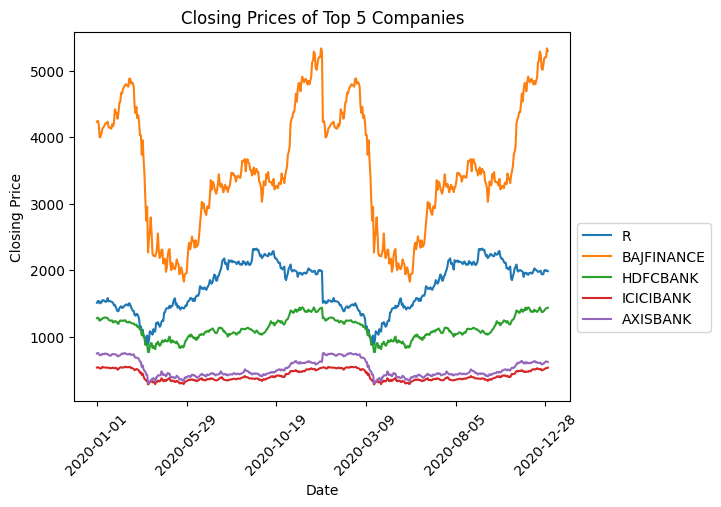

In [138]:
ax=temp[temp['Symbol']=='RELIANCE'].plot(y='Close',use_index=True,label='R')

for company in top_5:
  if company != 'RELIANCE':
    temp[temp['Symbol']==company].plot(y='Close',use_index=True,ax=ax,label=company)

plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Closing Prices of Top 5 Companies')
plt.xticks(rotation=45)
plt.legend(loc='best',bbox_to_anchor=(1,0.5))
plt.show()

### `Problem-7` Scatter plot Close price vs Volume for TOP-5 Stocks in year 2021
* Color on Symbol Column

In [150]:
column_to_encode = 'Symbol'
label_encode=LabelEncoder()
df2[column_to_encode]=label_encode.fit_transform(df2[column_to_encode])

In [169]:
df2.head()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades
Date,,,,,,,,,,,,
2000-01-03,19,EQ,157.40,166.00,170.00,166.00,170.00,170.00,169.52,33259.0,5.638122e+11,NaN
2000-01-04,19,EQ,170.00,182.00,183.45,171.00,174.00,173.80,174.99,168710.0,2.952261e+12,NaN
2000-01-05,19,EQ,173.80,170.00,173.90,165.00,168.00,166.95,169.20,159820.0,2.704094e+12,NaN
2000-01-06,19,EQ,166.95,168.00,170.00,165.30,168.95,168.30,168.44,85026.0,1.432166e+12,NaN
2000-01-07,19,EQ,168.30,162.15,171.00,162.15,170.75,168.35,166.79,85144.0,1.420158e+12,NaN


In [151]:
temp=df2[df2.index.str.contains('2021')]

In [152]:
top_5=temp.groupby('Symbol')['Turnover'].sum().sort_values(ascending=False).head(5).index

In [153]:
temp_df=temp[temp['Symbol'].isin(top_5)]

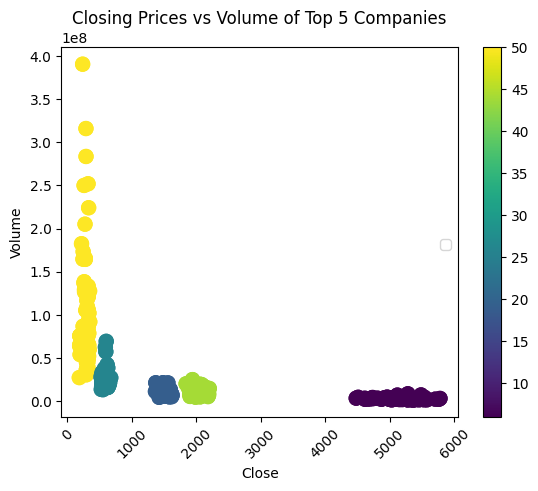

In [167]:
plt.scatter(temp_df['Close'],temp_df['Volume'],cmap='viridis',c=temp_df['Symbol'],marker='o',s=100)
plt.xlabel('Close')
plt.ylabel('Volume')
plt.title('Closing Prices vs Volume of Top 5 Companies')
plt.xticks(rotation=45)
plt.legend(loc='best',bbox_to_anchor=(1,0.5))
plt.colorbar()
plt.show()

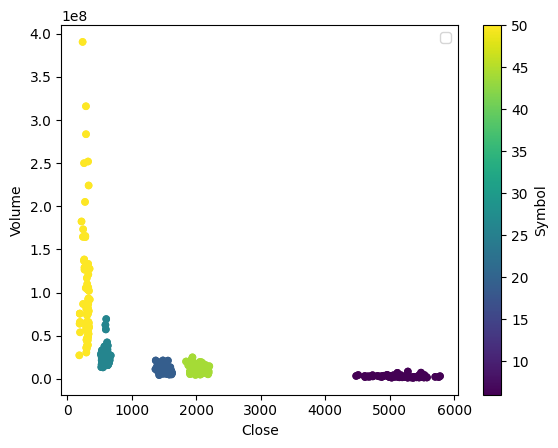

In [170]:
temp_df.plot(kind='scatter', x='Close', y='Volume', c='Symbol', colormap='viridis')
plt.legend()

In [ ]:
# code here
plt.scatter(temp)

### `Problem-8` Create a 3-D Scatter Plot using `time,x,y` on below synthetic data. and give color gradiant on `z`
```
# Create a 3D dataset
time = np.linspace(0, 10, 100)
x = np.sin(time)
y = np.cos(time)
z = time

# Create a DataFrame from the dataset
data = pd.DataFrame({'time': time, 'x': x, 'y': y, 'z': z})
```

In [174]:
# code here
time = np.linspace(0, 10, 100)
x = np.sin(time)
y = np.cos(time)
z=time
data = pd.DataFrame({'time': time, 'x': x, 'y': y, 'z': z})
data

,time,x,y,z
0,0.00000,0.000000,1.000000,0.00000
1,0.10101,0.100838,0.994903,0.10101
2,0.20202,0.200649,0.979663,0.20202
3,0.30303,0.298414,0.954437,0.30303
4,0.40404,0.393137,0.919480,0.40404
...,...,...,...,...
95,9.59596,-0.170347,-0.985384,9.59596
96,9.69697,-0.268843,-0.963184,9.69697
97,9.79798,-0.364599,-0.931165,9.79798
98,9.89899,-0.456637,-0.889653,9.89899


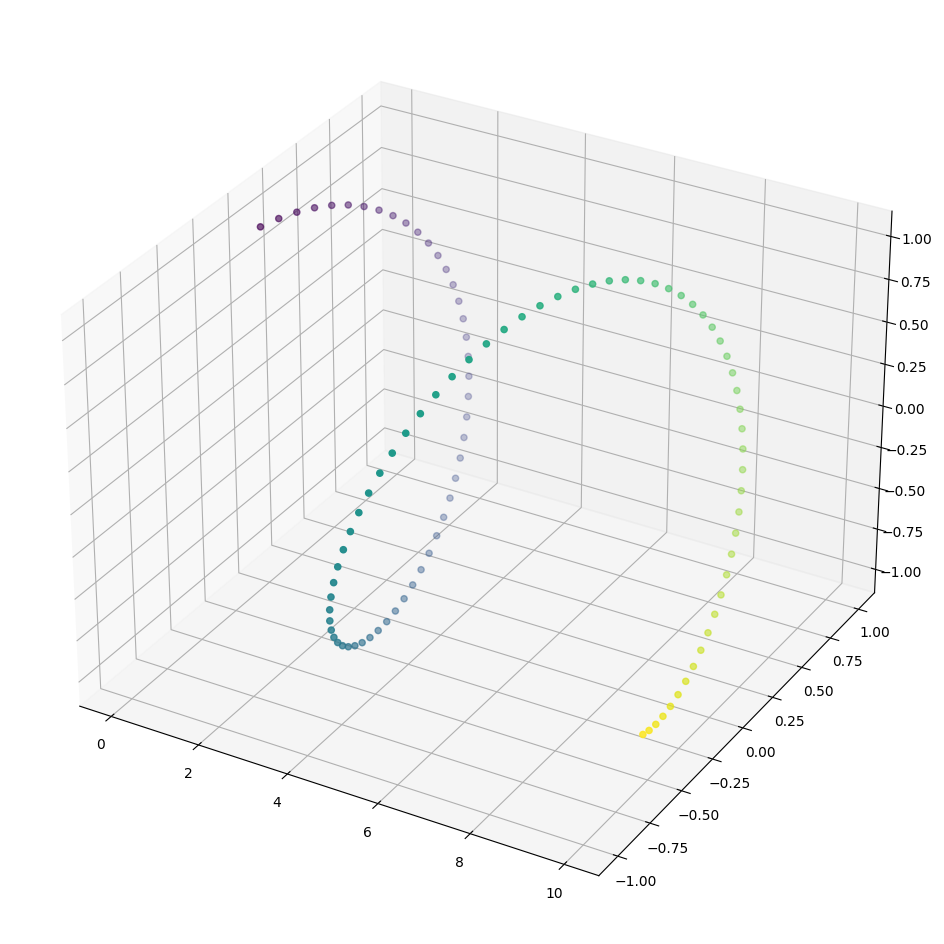

In [176]:
fig=plt.figure(figsize=(12,12))
ax=plt.subplot(projection='3d')
ax.scatter3D(data['time'],data['x'],data['y'],c=data['z'])

### `Problem 9:` Create a surface plot and the 2 types of the contour plots of the below equation.

$$z = sin(\sqrt{x^2 + y^2})$$


In [189]:
# code here
s=np.linspace(-10,10,100)
p=np.linspace(-10,10,100)

In [190]:
xx,yy=np.meshgrid(s,p)

In [191]:
T=np.sin(np.sqrt(xx**2,yy**2))
T.shape

(100, 100)

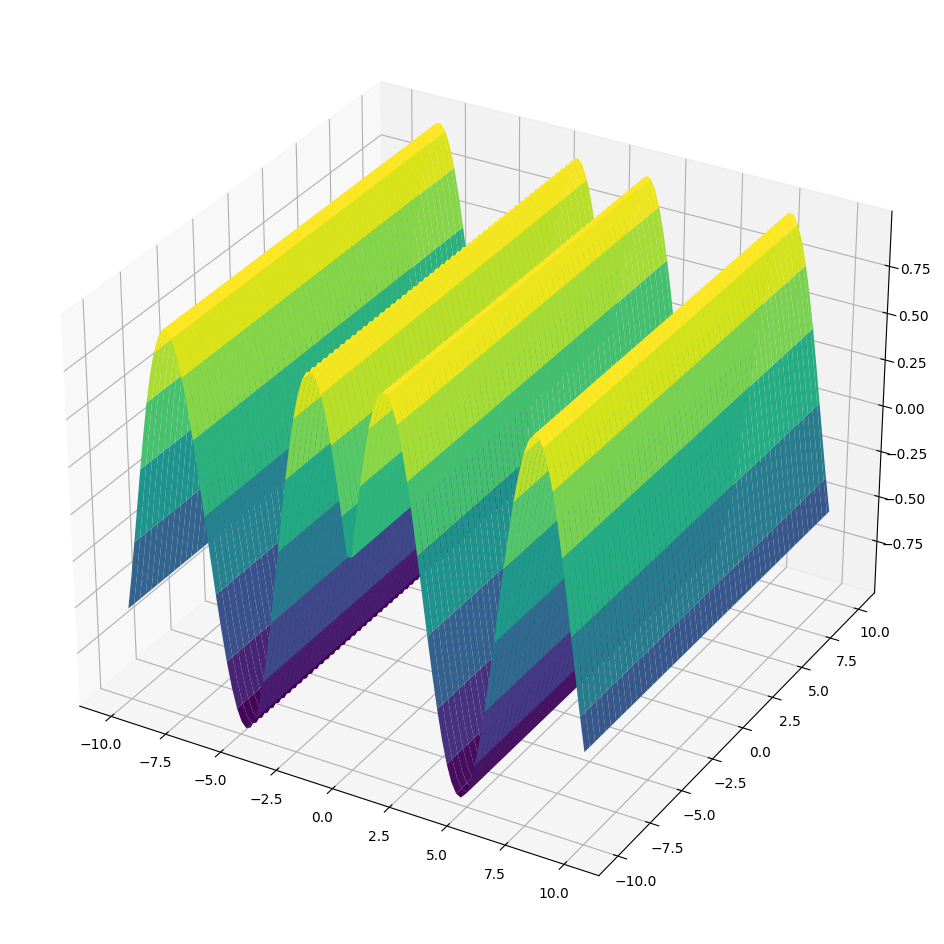

In [192]:
fig=plt.figure(figsize=(12,12))
ax=plt.subplot(projection='3d')
ax.plot_surface(xx,yy,T,cmap='viridis')

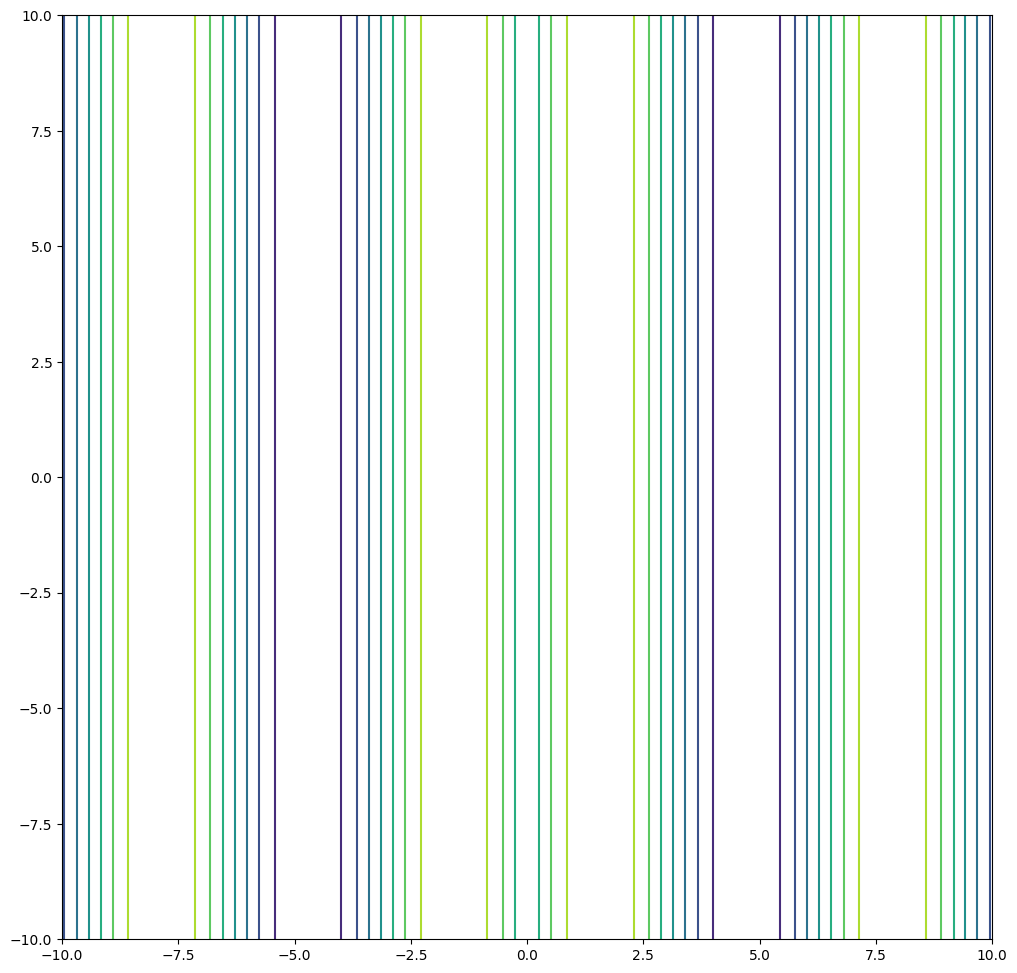

In [194]:
fig=plt.figure(figsize=(12,12))
ax=plt.subplot()
ax.contour(xx,yy,T,cmap='viridis')

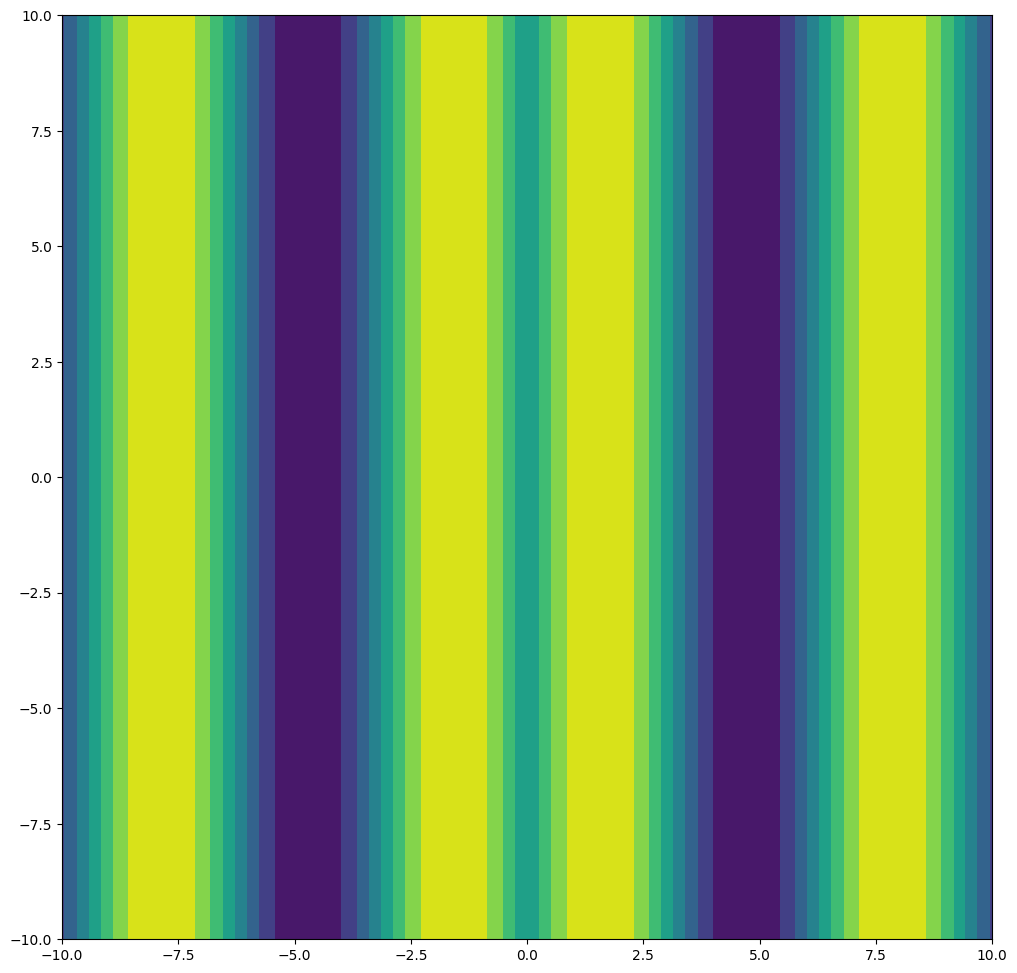

In [196]:
fig=plt.figure(figsize=(12,12))
ax=plt.subplot()
ax.contourf(xx,yy,T,cmap='viridis')

### `Problem 10:` Create a surface plot and the 2 types of the contour plots of the below equation.

$$z = tan(\log_2({x^2 + y^2})$$

In [198]:
# code here
a=np.linspace(-10,10,100)
b=np.linspace(-10,10,100)

In [199]:
aa,bb=np.meshgrid(a,b)

In [200]:
z=np.tan(np.log2(aa**2,bb**2))

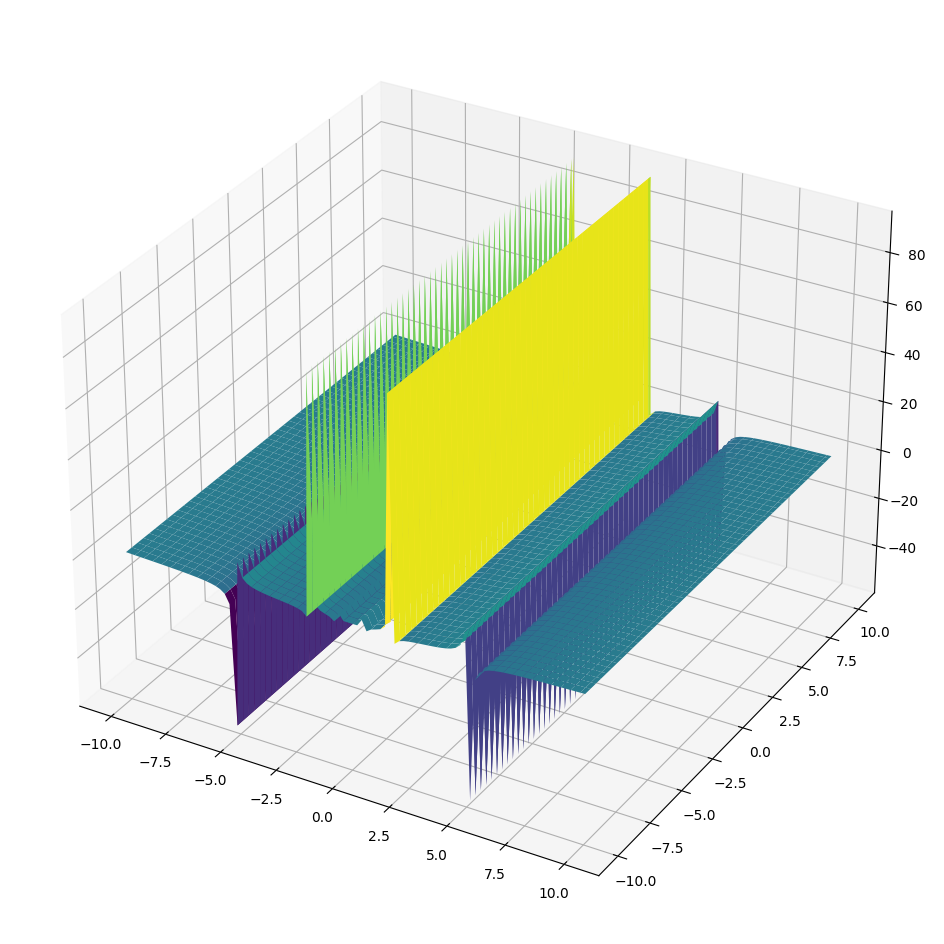

In [202]:
fig=plt.figure(figsize=(12,12))
ax=plt.subplot(projection='3d')
ax.plot_surface(aa,bb,z,cmap='viridis')

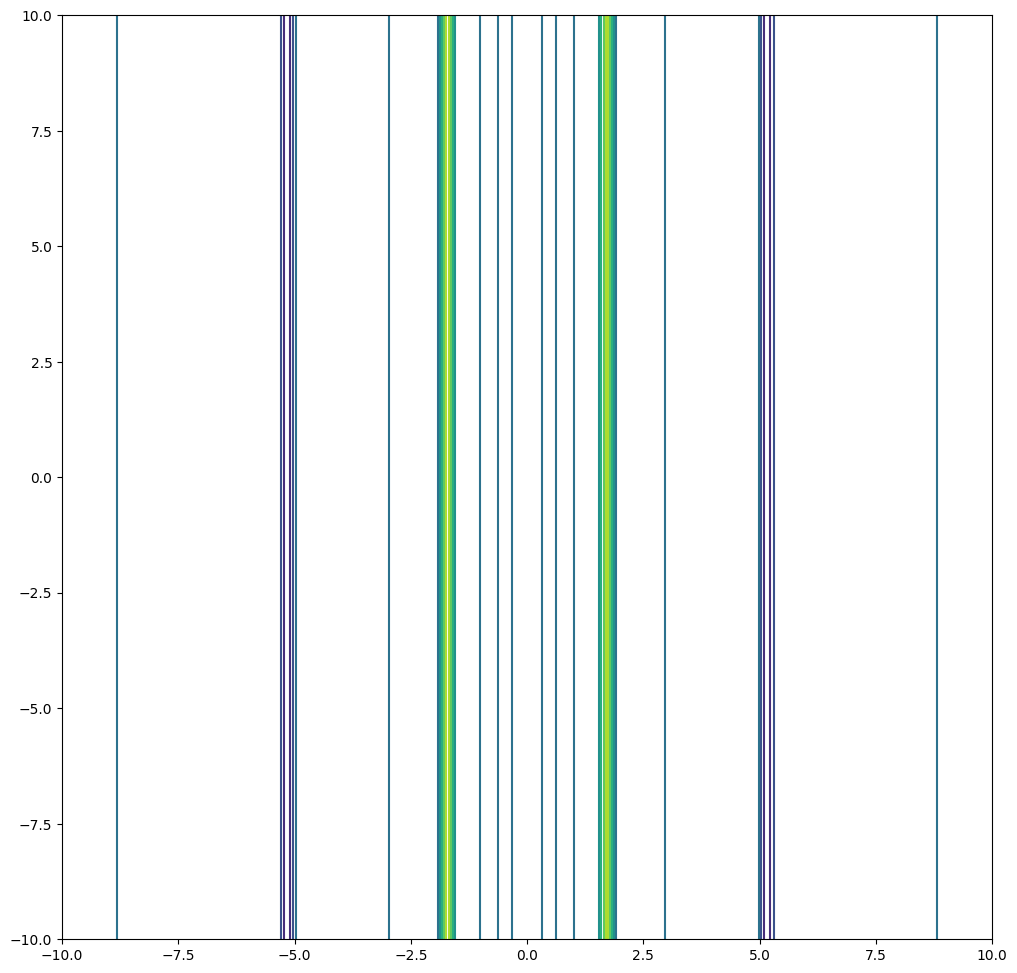

In [203]:
fig=plt.figure(figsize=(12,12))
ax=plt.subplot()
ax.contour(aa,bb,z,cmap='viridis')

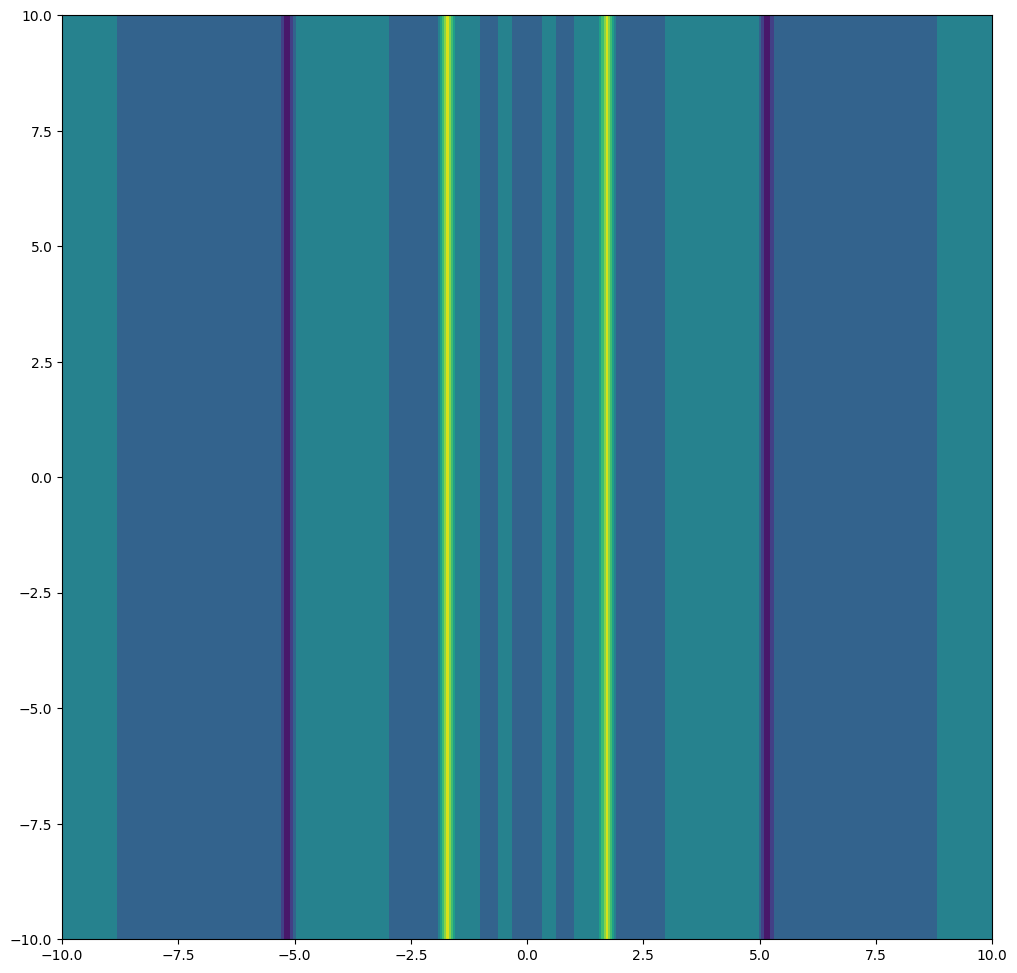

In [204]:
fig=plt.figure(figsize=(12,12))
ax=plt.subplot()
ax.contourf(aa,bb,z,cmap='viridis')